In [1]:
#conda install python-graphviz

In [2]:
#conda install pydotplus

In [3]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(r'C:\Users\tyagir01\Desktop\Data Analytics Problem Set\Cart_model.xlsx')
df

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [4]:
# DATA ENCODING PROCEDURE 
# LabelEncoder() : This method is used to normalize labels. It can also be used to transform non-numerical labels to numerical labels.
#Fit_transform() : This method is used for Fitting label encoder and return encoded labels.

In [6]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [7]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [8]:
df['age_n'] = le_age.fit_transform(df['age'])
df['income_n'] = le_income.fit_transform(df['income'])
df['student_n'] = le_student.fit_transform(df['student'])
df['credit_rating_n'] = le_credit_rating.fit_transform(df['credit_rating'])
df['buys_computer_n'] = le_buys_computer.fit_transform(df['buys_computer'])

In [9]:
# Structuring Dataframe

In [9]:
df.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [10]:
df_new = df.drop(['age','income','student','credit_rating','buys_computer',], axis = 'columns')
df_new.head()

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [12]:
# Independent and dependent variable selection 

In [11]:
feature_cols = ['age_n','income_n','student_n','credit_rating_n']
x = df_new.drop(['RID', 'buys_computer_n'], axis = 'columns') #input
y = df_new['buys_computer_n']  #target

In [12]:
x.head()

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1


In [13]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: buys_computer_n, dtype: int32

In [14]:
# Build The Decision Tree without Splitting

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x,y)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# Visualizing the Decision Tree Generated above

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pdp

In [17]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = pdp.graph_from_dot_data(dot_data.getvalue())

graph.write_png("buys_computer.png")

True

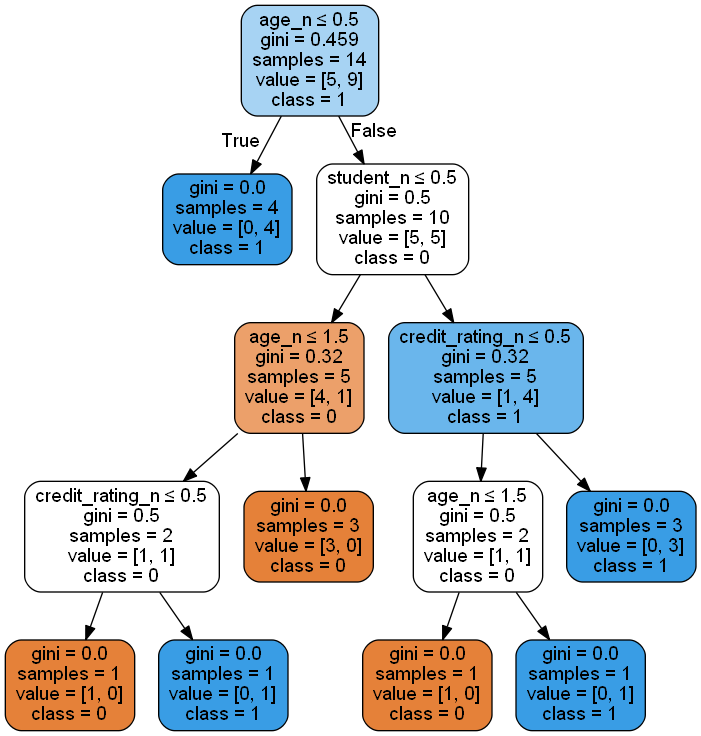

In [19]:
Image(graph.create_png())